In [1]:
import qiskit

In [3]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.10.0',
 'qiskit-aer': '0.3.2',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.3.3',
 'qiskit-aqua': '0.6.1',
 'qiskit': '0.13.0'}

## Primeiro passo

Debug o código num simulador e depois mandamos para um device quântico.

Para usarmos o equipamento quântico da IBM precisamos de uma API token, isso nos dá a permissão para acessar o computador.

## Criando uma conta na IBM Quantum Experience website

https://quantum-computing.ibm.com/

Uma vez criada a conta veremos uma página que nos permitirá criar um circuito quântico ou usar notebooks on-line do qiskit. É o mesmo que rodar o Jupyter, só que dentro da área logada da IBM.

Para ter acesso ao seu API token, basta clicar em profile > my account > copy token


In [5]:
from qiskit import IBMQ

In [7]:
IBMQ.save_account('6f69afce1e1aa7a99bc6afc51cbefd81615ab47091a38fe85b58ee5edc30a31a04b67ec6b14e870d086645ce8c16b2f362ee285fe4a3d9afef07fc9a3b7bc56e')

## Agora estamos prontos para acessar o computador quântico da IBM!!! 

Podemos rodar códigos de nosso computador ou enviar circuitos quânticos para serem rodados nas máquinas da IBM e pegar os resultados.

Os códigos podem ser executados nos simuladores ou hardwares quânticos, por exemplo, games, aplicações para indústria

In [8]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

## Hello World!

Nossa primeira aplicação em mecânica quântica usando Qiskit.

In [9]:
# importamos toda a pasta qiskit
from qiskit import *

In [10]:
# Agora vamos montar nosso circuito quântico
# Circuito quântico de 2 qubits

#criando um registrador de 2 qubits
qr = QuantumRegister(2)

In [11]:
# agora vamos construir dois bits clássicos para pegarmos algumas medidas destes qubits
cr = ClassicalRegister(2)

In [12]:
# podemos construir um circuito usando as duas variáveis criadas
circuit = QuantumCircuit(qr, cr)

In [14]:
# se quisermos modificar ou visualiza, basta chamarmos a tão conhecida biblioteca matplotlib
%matplotlib inline
circuit.draw()

In [15]:
# este circuito não tem muito o que fazer. Agora o próximo passo é criar gates.
# para criarmos o entaglement devemos aplicar o Hadamard gate no primeiro qubit (https://en.wikipedia.org/wiki/Quantum_entanglement)
circuit.h(qr[0])

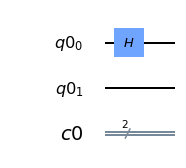

In [16]:
#vamos visualizar
# O H no primeiro circuito é o Hadamard gate
circuit.draw(output = 'mpl')

In [17]:
# vamos criar uma operação de dois qubits chamada controlled X. Esta operação é equivalente ao logical IF, ou seja, a versão quântica do IF ELSE.
circuit.cx(qr[0], qr[1])

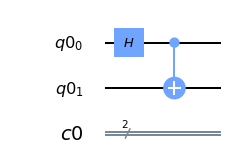

In [18]:
# vamos ver como nosso circuito ficou
# nosso circuito contém um gate Hadamard e um nó
# com estas duas simples operações podemos gerar entanglement entre q0_0 e q0_1
circuit.draw(output = 'mpl')

In [19]:
# o próximo passo é medir estes qubits e armazenar num bit clássico
circuit.measure(qr, cr)

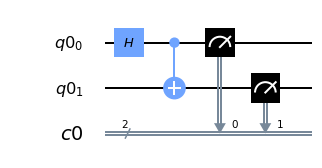

In [20]:
circuit.draw(output = 'mpl')

In [21]:
# Passo seguinte é rodar o circuito
# vamos rodar o circuito quântico no nosso computador clássico e ver o que acontece quando simulamos um computador quântico
# depois mandaremos para um device quântico da IBM e observar os resultados
# para simular em maquina local usaremos o componente aer do qiskit
simulator = Aer.get_backend('qasm_simulator') #quantum assembly language

In [22]:
# executar
execute(circuit, backend = simulator)

In [23]:
result = execute(circuit, backend = simulator).result()

In [24]:
# vamos visualizar os resultados
from qiskit.tools.visualization import plot_histogram

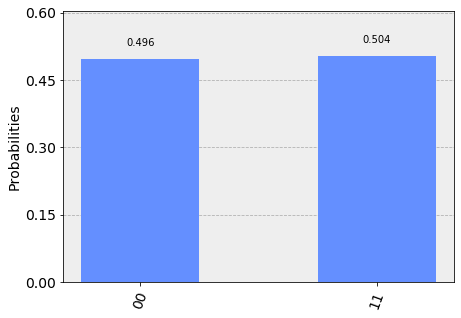

In [26]:
# a diferença ocorre pq estamos rodando um número limitado de simulações e não infinitas
plot_histogram(result.get_counts(circuit))

In [28]:
# agora vamos rodar no computador quântico da IBM
IBMQ.load_account()

/home/diluisi/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:181: UserWarning: Credentials are already in use. The existing account in the session will be replaced.
  warnings.warn('Credentials are already in use. The existing '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [30]:
provider = IBMQ.get_provider('ibm-q')

#definir o computador qunatico que vamos trabalhar
qcomp = provider.get_backend('ibmq_16_melbourne')

job = execute(circuit, backend = qcomp)

In [32]:
from qiskit.tools.monitor import job_monitor

# como a máquina é pública tem uma fila que podemos monitorar
job_monitor(job)

Job Status: job has successfully run


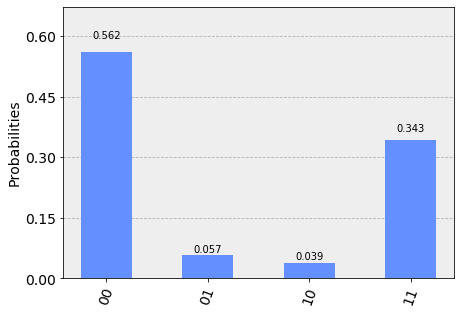

In [33]:
# dependendo de quão ocupado o device está o job pode levar alguns minutos
# armazenamos o resultado do job e plotamos
result2 = job.result()
plot_histogram(result2.get_counts(circuit))
# observamos que o resultado é um pouco difetente. Além do estado 00 e 11 temos 01 e 10
# o simulador simula um device perfeitamente quântico
# no real temos um pequeno valor de erros quânticos aceitáveis. Este erro é melhorado cada dia que passa com novas tecnologias.
# A expectativa é que estes erros sejam cada vez menores e se aproximem da simulação ideal
# como o device ainda nao é perfeito percebemos a diferença dos resulados


# References

[Github Qiskit]

https://qiskit.org/

https://github.com/Qiskit

[Series]

https://www.youtube.com/playlist?list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY

[Acesso]

https://quantum-computing.ibm.com/account